<a href="https://colab.research.google.com/github/manoelpajr/projeto_data_science/blob/master/violencia_rio_de_janeiro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Analisando a violência do Estado do Rio de Janeiro**

A violência é um problema de difícil resolução e que atinge todos os países do mundo; uns com mais e outros com menos intensidade. O Brasil está no rol dos países que possuem elevados indicadores de violência. Segundo a Oranização das Nações Unidas - [ONU](http://www.onu.org), em sua publicação, *World Statistics 2018*, o país possuia a sétima maior taxa de homícidio das Américas, com `31.3` mortes por homicídios para cada 100 mil habitantes. 

O endereço para acessar o relatório encontra-se nesse [link](https://apps.who.int/iris/bitstream/handle/10665/272596/9789241565585-eng.pdf?ua=1&ua=1).

Para ilustrar a situação brasileira, observe o infográfico abaixo sobre número de mortes por armas de fogo em alguns países do mundo, dentre eles, o Brasil. 

<img alt="Cidade de Buenos Aires" width="50%" src='https://odia.ig.com.br/_midias/jpg/2018/09/07/mortesbra5000-7915914.jpg'>

Da mesma forma, se formos trabalhar nas escalas estaduais e municipais, teremos diferentes intensidades desse problema chamado, violência. Como nosso trabalho é para o Estado do Rio de Janeiro, daremos uma atenção especial a ele. 

Segundo dados obtidos no [Monitor da Violência](https://especiais.g1.globo.com/monitor-da-violencia/2018/mortes-violentas-no-brasil/), o estado do Rio, em 2019, teve `23.38` homicídios a cada 100 mil habitantes, encontrando-se abaixo da média nacional. Levando-se em consideração todos os crimes violentos ("Homicídio Doloso", "Latrocínio" e "Lesão Corporal Seguida de Morte"), a taxa chega a `24.21` a cada 100 mil habitantes. Para ilustrar o que estamos falando, observem o infográfico a seguir sobre a taxa médias de homicídios a cada 100 mil habitantes para o estado do Rio de Janeiro, em 2016

<img alt="Cidade de Buenos Aires" width="50%" src='https://casafluminense.org.br/wp-content/uploads/2018/04/03-infogr%C3%A1fico-tw.png'>

No entanto, mesmo estando abaixo da média nacional, o estado do Rio de Janeiro, tem indicadores de violência elevados. Para vivenciarmos isso, basta assistir a um telejornal, ou ler algum jornal ou site na internet, nos quais, quase que diariamente, temos alguma notícia sobre a violência nesse estado.

Vamos então dar uma olhada nos dados da violência do estado do Rio de Janeiro para tentarmos entender melhor esses valores supracitados.


##**Obtenção dos dados**

Os dados foram obtidos através do Portal de Dados Abertos do Instituto de Segurança Pública do Rio de Janeiro - [ISP](http://www.ispdados.rj.gov.br/estatistica.html). Nesse portal encontra-se uma série de dados obtidos ao longo do tempo e que podem ser explorados e analisados por meio de técnicas de *Data Science*.

O arquivo `csv` utilizado nesse trabalho encontra-se nesse [link](https://raw.githubusercontent.com/manoelpajr/dataframes/master/DOMensalEstadoDesde1991.csv).

Nesse primeito momento, importaremos as bibliotecas utilizadas no trabalho e o *dataset*. Depois de realizado esses passos, iremos olhar as primeiras e as últimas linhas do nosso banco de dados para visualizarmos como eles estão representados. Utilizaremos o `head()` e o `tail()`, respectivamente.

In [2]:
#importação das bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


#importacao do dataset
df = pd.read_csv('https://raw.githubusercontent.com/manoelpajr/dataframes/master/DOMensalEstadoDesde1991.csv')

#visualizando as primeiras entradas
df.head()

,ano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,letalidade_violenta,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_cvli,indicador_roubo_rua,indicador_roubo_veic,indicador_roubo_carga,registro_ocorrencias,fase
0,1991,1,657,NaN,15,NaN,672,162,3051,NaN,NaN,NaN,350,188,1174,63,967,381,37,NaN,NaN,NaN,NaN,NaN,158,3318,2009,1147,NaN,NaN,NaN,3561,6717,NaN,NaN,NaN,NaN,133,NaN,NaN,NaN,872,NaN,NaN,NaN,NaN,NaN,NaN,217,NaN,NaN,NaN,NaN,1348,1174,63,NaN,3
1,1991,2,732,NaN,17,NaN,749,175,3421,NaN,NaN,NaN,357,171,1097,64,963,432,35,NaN,NaN,NaN,NaN,NaN,142,3261,1850,1066,NaN,NaN,NaN,3309,6225,NaN,NaN,NaN,NaN,127,NaN,NaN,NaN,751,NaN,NaN,NaN,NaN,NaN,NaN,209,NaN,NaN,NaN,NaN,1395,1097,64,NaN,3
2,1991,3,713,NaN,25,NaN,738,216,3613,NaN,NaN,NaN,443,191,1265,71,963,422,43,NaN,NaN,NaN,NaN,NaN,131,3529,2084,1062,NaN,NaN,NaN,3573,6719,NaN,NaN,NaN,NaN,80,NaN,NaN,NaN,789,NaN,NaN,NaN,NaN,NaN,NaN,188,NaN,NaN,NaN,NaN,1385,1265,71,NaN,3
3,1991,4,634,NaN,20,NaN,654,200,3211,NaN,NaN,NaN,425,199,1415,81,1186,354,36,NaN,NaN,NaN,NaN,NaN,112,3808,2085,1195,NaN,NaN,NaN,3290,6570,NaN,NaN,NaN,NaN,133,NaN,NaN,NaN,787,NaN,NaN,NaN,NaN,NaN,NaN,140,NaN,NaN,NaN,NaN,1540,1415,81,NaN,3
4,1991,5,650,NaN,20,NaN,670,146,3051,NaN,NaN,NaN,553,231,1449,82,931,335,27,NaN,NaN,NaN,NaN,NaN,147,3755,2185,723,NaN,NaN,NaN,3546,6454,NaN,NaN,NaN,NaN,163,NaN,NaN,NaN,845,NaN,NaN,NaN,NaN,NaN,NaN,78,NaN,NaN,NaN,NaN,1266,1449,82,NaN,3


In [3]:
#visualizando as último cinco entradas
df.tail()

,ano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,letalidade_violenta,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_cvli,indicador_roubo_rua,indicador_roubo_veic,indicador_roubo_carga,registro_ocorrencias,fase
348,2020,1,358,4.0,8,156.0,526,448,5369,398.0,145.0,1936.0,414,74,3246,577,6194,1181,1,5.0,2188.0,6.0,99.0,29.0,1852,15866,1365,2118,582.0,1744.0,278.0,8562,14649,0.0,98.0,9.0,3950.0,1720,734.0,877.0,140.0,2128,2857.0,482.0,1335.0,265.0,4942.0,400.0,36,1.0,2.0,0.0,370.0,9563,3246,577,65718.0,3
349,2020,2,326,2.0,10,164.0,502,421,5408,420.0,153.0,1890.0,382,61,2925,418,5692,1298,2,7.0,2065.0,4.0,81.0,12.0,1555,14502,1182,2133,568.0,2270.0,231.0,7328,13712,0.0,103.0,10.0,3547.0,1738,776.0,877.0,111.0,1788,2883.0,431.0,1190.0,243.0,4643.0,378.0,39,2.0,1.0,0.0,338.0,9055,2925,418,62850.0,3
350,2020,3,374,2.0,9,115.0,500,361,4069,367.0,130.0,1248.0,308,71,2449,365,4400,984,0,7.0,1541.0,5.0,93.0,18.0,1720,11961,1114,1210,394.0,1139.0,180.0,6752,10789,0.0,99.0,16.0,3086.0,1469,558.0,814.0,128.0,1526,2543.0,385.0,914.0,180.0,3243.0,272.0,16,0.0,1.0,0.0,385.0,6925,2449,365,49816.0,3
351,2020,4,311,5.0,5,177.0,498,324,2724,241.0,127.0,590.0,169,56,1847,337,2536,498,2,4.0,987.0,1.0,53.0,13.0,1406,7909,922,283,105.0,304.0,106.0,4001,5721,0.0,95.0,9.0,2594.0,1436,428.0,918.0,123.0,1114,2452.0,410.0,544.0,2.0,2216.0,178.0,26,3.0,1.0,0.0,321.0,4021,1847,337,32814.0,2
352,2020,5,273,0.0,6,129.0,408,291,2430,261.0,128.0,686.0,169,46,1586,455,2451,421,2,8.0,942.0,2.0,44.0,5.0,1185,7316,904,255,108.0,356.0,84.0,4266,5973,0.0,85.0,7.0,3572.0,1581,535.0,935.0,140.0,991,2169.0,314.0,687.0,6.0,2301.0,181.0,16,4.0,0.0,1.0,279.0,3814,1586,455,35003.0,2


Aqui podemos visualizar que existem variáveis com entradas nulas `NaN`, no início do nosso *dataset* e a data está sendo representada por uma coluna `ano` e outra coluna `mes`. 

## **Analise inicial dos Dados**

É de suma importância conheceros o *dataset* que estamos trabalhando, por isso sempre é bom dar uma visualizada no tamanho, no nome das colunas, nos tipos de variáveis e em outras informações relevantes para futuras analises.


###**Tamanho do DataFrame**

Iniciaremos nossa exploração visualizando o tamanho do nosso *dataset*, ou seja, a quantidade de variáveis e de entradas que ele possui. Para isso utilizaremos o método `shape()`.

In [4]:
#tamanho do DataFrame
print('Dimensões do dataset:',
      '\n Variáveis: ', df.shape[1],
      '\n Entradas: ', df.shape[0])


Dimensões do dataset: 
 Variáveis:  58 
 Entradas:  353


Nosso *dataframe* é composto por 58 variáveis (colunas) e 353 entradas (linhas).

###**Conhecendo o nome das nossas variáveis**

É comum querermos saber o nome das nossas variáveis (colunas), para isso utilizaremos o atributo `columns`.

In [5]:
#imprimir o nome das colunas
df.columns

Index(['ano', 'mes', 'hom_doloso', 'lesao_corp_morte', 'latrocinio',
       'hom_por_interv_policial', 'letalidade_violenta', 'tentat_hom',
       'lesao_corp_dolosa', 'estupro', 'hom_culposo', 'lesao_corp_culposa',
       'roubo_comercio', 'roubo_residencia', 'roubo_veiculo', 'roubo_carga',
       'roubo_transeunte', 'roubo_em_coletivo', 'roubo_banco',
       'roubo_cx_eletronico', 'roubo_celular', 'roubo_conducao_saque',
       'roubo_apos_saque', 'roubo_bicicleta', 'outros_roubos', 'total_roubos',
       'furto_veiculos', 'furto_transeunte', 'furto_coletivo', 'furto_celular',
       'furto_bicicleta', 'outros_furtos', 'total_furtos', 'sequestro',
       'extorsao', 'sequestro_relampago', 'estelionato', 'apreensao_drogas',
       'posse_drogas', 'trafico_drogas', 'apreensao_drogas_sem_autor',
       'recuperacao_veiculos', 'apf', 'aaapai', 'cmp', 'cmba', 'ameaca',
       'pessoas_desaparecidas', 'encontro_cadaver', 'encontro_ossada',
       'pol_militares_mortos_serv', 'pol_civis_mor

Essas são as 58 colunas disponíveis em nosso *dataset*. No entanto, verificamos que algumas delas são auto explicáveis e outras não, pois são representadas por um código. Para melhor compreensão das nossas variáveis vejamos o significado de cada um delas:

   *   `apf` - Auto de prisão em flagrante
   *   `aaapai` - Auto de apreensão de adolescente por prática de ato infracional.
   *   `cmp` - Cumprimento de mandato de prisão.
   *   `cmba` - Cumprimento de mandato de busca e apreensão.

Todas essas informações foram retiradas do site do "ISP" e estão disponíveis nesse [link](http://www.ispvisualizacao.rj.gov.br/).

###**Verificação das variáveis**

Além dessas informações extraídas anteriormente, verificar o tipo de dados com o qual iremos trabalhar é muito profícuo para as futuras analises. É nesse momento que iremos saber se algumas das variáveis precisaram passar por alguma transformação, ou não.

Para verificar o tipo das variáveis utilizaremos o atributo `dtypes`.

In [6]:
#verificar o tipo das variáveis
df.dtypes

ano                             int64
mes                             int64
hom_doloso                      int64
lesao_corp_morte              float64
latrocinio                      int64
hom_por_interv_policial       float64
letalidade_violenta             int64
tentat_hom                      int64
lesao_corp_dolosa               int64
estupro                       float64
hom_culposo                   float64
lesao_corp_culposa            float64
roubo_comercio                  int64
roubo_residencia                int64
roubo_veiculo                   int64
roubo_carga                     int64
roubo_transeunte                int64
roubo_em_coletivo               int64
roubo_banco                     int64
roubo_cx_eletronico           float64
roubo_celular                 float64
roubo_conducao_saque          float64
roubo_apos_saque              float64
roubo_bicicleta               float64
outros_roubos                   int64
total_roubos                    int64
furto_veicul

Verificando o tipo das variáveis observa-se que todas elas são numéricas/quantitativas, sendo do tipo `int64` ou `float64`. Ou seja, esse *dataset* não possui nenhuma informação categórica e isso já era de se esperar, pois estamos trabalhando com quantidades de homíciodos, de furtos, de apreensões, dentre outras informações.

No entanto, temos duas colunas que devem passar por conversão do tipo. As colunas `ano` e `mes` devem ser do tipo `datetime`. Para realizarmos essa conversão utilizaremos o método `pd.to_datetime`.

Contudo, será necessário alguns passos antes de realizar essa conversão. Vejamos como fazer isso a seguir.


Nosso objetivo aqui será concatenar as duas colunas `ano` e `mes` para um coluna chamada `data`. Para isso, precisamos primeiros transformar as variáveis para `string` utilizando o método `astype()`.

In [7]:
#transformando as variáveis ano e mes para string

df['ano'], df['mes'] = df['ano'].astype(str), df['mes'].astype(str)

Outr mudança está relacionado aos números dos meses, pois, os número de 1 até 9 deveriam estar com dois dígitos, ou seja, deveriam aparecer 01 até 09. Para realizarmos essa transformação utilizaremos o método `apply()` e o `format()`, e a função `lambda()`. 

In [8]:
#formatando os números dos meses
df['mes'] = df['mes'].apply(lambda x: '{0:0>2}'.format(x))

#imprimindo o dataset para ver as transformações
df.head()

,ano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,letalidade_violenta,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_cvli,indicador_roubo_rua,indicador_roubo_veic,indicador_roubo_carga,registro_ocorrencias,fase
0,1991,01,657,NaN,15,NaN,672,162,3051,NaN,NaN,NaN,350,188,1174,63,967,381,37,NaN,NaN,NaN,NaN,NaN,158,3318,2009,1147,NaN,NaN,NaN,3561,6717,NaN,NaN,NaN,NaN,133,NaN,NaN,NaN,872,NaN,NaN,NaN,NaN,NaN,NaN,217,NaN,NaN,NaN,NaN,1348,1174,63,NaN,3
1,1991,02,732,NaN,17,NaN,749,175,3421,NaN,NaN,NaN,357,171,1097,64,963,432,35,NaN,NaN,NaN,NaN,NaN,142,3261,1850,1066,NaN,NaN,NaN,3309,6225,NaN,NaN,NaN,NaN,127,NaN,NaN,NaN,751,NaN,NaN,NaN,NaN,NaN,NaN,209,NaN,NaN,NaN,NaN,1395,1097,64,NaN,3
2,1991,03,713,NaN,25,NaN,738,216,3613,NaN,NaN,NaN,443,191,1265,71,963,422,43,NaN,NaN,NaN,NaN,NaN,131,3529,2084,1062,NaN,NaN,NaN,3573,6719,NaN,NaN,NaN,NaN,80,NaN,NaN,NaN,789,NaN,NaN,NaN,NaN,NaN,NaN,188,NaN,NaN,NaN,NaN,1385,1265,71,NaN,3
3,1991,04,634,NaN,20,NaN,654,200,3211,NaN,NaN,NaN,425,199,1415,81,1186,354,36,NaN,NaN,NaN,NaN,NaN,112,3808,2085,1195,NaN,NaN,NaN,3290,6570,NaN,NaN,NaN,NaN,133,NaN,NaN,NaN,787,NaN,NaN,NaN,NaN,NaN,NaN,140,NaN,NaN,NaN,NaN,1540,1415,81,NaN,3
4,1991,05,650,NaN,20,NaN,670,146,3051,NaN,NaN,NaN,553,231,1449,82,931,335,27,NaN,NaN,NaN,NaN,NaN,147,3755,2185,723,NaN,NaN,NaN,3546,6454,NaN,NaN,NaN,NaN,163,NaN,NaN,NaN,845,NaN,NaN,NaN,NaN,NaN,NaN,78,NaN,NaN,NaN,NaN,1266,1449,82,NaN,3


Observem que agora os números dos meses estão formatados da forma correta, todos eles aparecem com dois dígitos.

Agora chegou o momento de criar a coluna `data` e concatenar as variáveis `ano` e `mes`. 

In [9]:
#concatenando as duas colunas na coluna data
df['data'] = df['ano']+'-'+df['mes']

#impressão dataset
df.head()

,ano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,letalidade_violenta,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_cvli,indicador_roubo_rua,indicador_roubo_veic,indicador_roubo_carga,registro_ocorrencias,fase,data
0,1991,01,657,NaN,15,NaN,672,162,3051,NaN,NaN,NaN,350,188,1174,63,967,381,37,NaN,NaN,NaN,NaN,NaN,158,3318,2009,1147,NaN,NaN,NaN,3561,6717,NaN,NaN,NaN,NaN,133,NaN,NaN,NaN,872,NaN,NaN,NaN,NaN,NaN,NaN,217,NaN,NaN,NaN,NaN,1348,1174,63,NaN,3,1991-01
1,1991,02,732,NaN,17,NaN,749,175,3421,NaN,NaN,NaN,357,171,1097,64,963,432,35,NaN,NaN,NaN,NaN,NaN,142,3261,1850,1066,NaN,NaN,NaN,3309,6225,NaN,NaN,NaN,NaN,127,NaN,NaN,NaN,751,NaN,NaN,NaN,NaN,NaN,NaN,209,NaN,NaN,NaN,NaN,1395,1097,64,NaN,3,1991-02
2,1991,03,713,NaN,25,NaN,738,216,3613,NaN,NaN,NaN,443,191,1265,71,963,422,43,NaN,NaN,NaN,NaN,NaN,131,3529,2084,1062,NaN,NaN,NaN,3573,6719,NaN,NaN,NaN,NaN,80,NaN,NaN,NaN,789,NaN,NaN,NaN,NaN,NaN,NaN,188,NaN,NaN,NaN,NaN,1385,1265,71,NaN,3,1991-03
3,1991,04,634,NaN,20,NaN,654,200,3211,NaN,NaN,NaN,425,199,1415,81,1186,354,36,NaN,NaN,NaN,NaN,NaN,112,3808,2085,1195,NaN,NaN,NaN,3290,6570,NaN,NaN,NaN,NaN,133,NaN,NaN,NaN,787,NaN,NaN,NaN,NaN,NaN,NaN,140,NaN,NaN,NaN,NaN,1540,1415,81,NaN,3,1991-04
4,1991,05,650,NaN,20,NaN,670,146,3051,NaN,NaN,NaN,553,231,1449,82,931,335,27,NaN,NaN,NaN,NaN,NaN,147,3755,2185,723,NaN,NaN,NaN,3546,6454,NaN,NaN,NaN,NaN,163,NaN,NaN,NaN,845,NaN,NaN,NaN,NaN,NaN,NaN,78,NaN,NaN,NaN,NaN,1266,1449,82,NaN,3,1991-05


Nossa coluna `data` apareceu no final do *dataset* da forma como queremos, ou seja, agora temos a informação dos anos e dos meses concatenadas em uma única coluna. Porém, ainda não a temos como `datetime` e para realizarmos essa transformação iremos utilizar o método `pd.to_datetime()`. 

In [10]:
#transformando a coluna data em datetime
df['data'] = pd.to_datetime(df['data'], format='%Y-%m')

#verificando o tipo das variáveis
df.dtypes

ano                                   object
mes                                   object
hom_doloso                             int64
lesao_corp_morte                     float64
latrocinio                             int64
hom_por_interv_policial              float64
letalidade_violenta                    int64
tentat_hom                             int64
lesao_corp_dolosa                      int64
estupro                              float64
hom_culposo                          float64
lesao_corp_culposa                   float64
roubo_comercio                         int64
roubo_residencia                       int64
roubo_veiculo                          int64
roubo_carga                            int64
roubo_transeunte                       int64
roubo_em_coletivo                      int64
roubo_banco                            int64
roubo_cx_eletronico                  float64
roubo_celular                        float64
roubo_conducao_saque                 float64
roubo_apos

Agora temos a nossa coluna `data` no formato desejado. Ela é uma variável do tipo `datetime`. No entanto, será necessário excluir as colunas `ano` e `mes` utilizando o método `drop()` e colocar nossa coluna `data` como `index`.

In [11]:
#excluindo as colunas ano e mes 
df.drop('ano', axis=1, inplace=True)
df.drop('mes', axis=1, inplace=True)

#tornando a coluna data em index
df.index = df['data']

#visualizando nosso dataser
df.head()


,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,letalidade_violenta,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_cvli,indicador_roubo_rua,indicador_roubo_veic,indicador_roubo_carga,registro_ocorrencias,fase,data
data,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1991-01-01,657,NaN,15,NaN,672,162,3051,NaN,NaN,NaN,350,188,1174,63,967,381,37,NaN,NaN,NaN,NaN,NaN,158,3318,2009,1147,NaN,NaN,NaN,3561,6717,NaN,NaN,NaN,NaN,133,NaN,NaN,NaN,872,NaN,NaN,NaN,NaN,NaN,NaN,217,NaN,NaN,NaN,NaN,1348,1174,63,NaN,3,1991-01-01
1991-02-01,732,NaN,17,NaN,749,175,3421,NaN,NaN,NaN,357,171,1097,64,963,432,35,NaN,NaN,NaN,NaN,NaN,142,3261,1850,1066,NaN,NaN,NaN,3309,6225,NaN,NaN,NaN,NaN,127,NaN,NaN,NaN,751,NaN,NaN,NaN,NaN,NaN,NaN,209,NaN,NaN,NaN,NaN,1395,1097,64,NaN,3,1991-02-01
1991-03-01,713,NaN,25,NaN,738,216,3613,NaN,NaN,NaN,443,191,1265,71,963,422,43,NaN,NaN,NaN,NaN,NaN,131,3529,2084,1062,NaN,NaN,NaN,3573,6719,NaN,NaN,NaN,NaN,80,NaN,NaN,NaN,789,NaN,NaN,NaN,NaN,NaN,NaN,188,NaN,NaN,NaN,NaN,1385,1265,71,NaN,3,1991-03-01
1991-04-01,634,NaN,20,NaN,654,200,3211,NaN,NaN,NaN,425,199,1415,81,1186,354,36,NaN,NaN,NaN,NaN,NaN,112,3808,2085,1195,NaN,NaN,NaN,3290,6570,NaN,NaN,NaN,NaN,133,NaN,NaN,NaN,787,NaN,NaN,NaN,NaN,NaN,NaN,140,NaN,NaN,NaN,NaN,1540,1415,81,NaN,3,1991-04-01
1991-05-01,650,NaN,20,NaN,670,146,3051,NaN,NaN,NaN,553,231,1449,82,931,335,27,NaN,NaN,NaN,NaN,NaN,147,3755,2185,723,NaN,NaN,NaN,3546,6454,NaN,NaN,NaN,NaN,163,NaN,NaN,NaN,845,NaN,NaN,NaN,NaN,NaN,NaN,78,NaN,NaN,NaN,NaN,1266,1449,82,NaN,3,1991-05-01


In [12]:
#visualizando as últimas entradas
df.tail()

,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,letalidade_violenta,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_cvli,indicador_roubo_rua,indicador_roubo_veic,indicador_roubo_carga,registro_ocorrencias,fase,data
data,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-01-01,358,4.0,8,156.0,526,448,5369,398.0,145.0,1936.0,414,74,3246,577,6194,1181,1,5.0,2188.0,6.0,99.0,29.0,1852,15866,1365,2118,582.0,1744.0,278.0,8562,14649,0.0,98.0,9.0,3950.0,1720,734.0,877.0,140.0,2128,2857.0,482.0,1335.0,265.0,4942.0,400.0,36,1.0,2.0,0.0,370.0,9563,3246,577,65718.0,3,2020-01-01
2020-02-01,326,2.0,10,164.0,502,421,5408,420.0,153.0,1890.0,382,61,2925,418,5692,1298,2,7.0,2065.0,4.0,81.0,12.0,1555,14502,1182,2133,568.0,2270.0,231.0,7328,13712,0.0,103.0,10.0,3547.0,1738,776.0,877.0,111.0,1788,2883.0,431.0,1190.0,243.0,4643.0,378.0,39,2.0,1.0,0.0,338.0,9055,2925,418,62850.0,3,2020-02-01
2020-03-01,374,2.0,9,115.0,500,361,4069,367.0,130.0,1248.0,308,71,2449,365,4400,984,0,7.0,1541.0,5.0,93.0,18.0,1720,11961,1114,1210,394.0,1139.0,180.0,6752,10789,0.0,99.0,16.0,3086.0,1469,558.0,814.0,128.0,1526,2543.0,385.0,914.0,180.0,3243.0,272.0,16,0.0,1.0,0.0,385.0,6925,2449,365,49816.0,3,2020-03-01
2020-04-01,311,5.0,5,177.0,498,324,2724,241.0,127.0,590.0,169,56,1847,337,2536,498,2,4.0,987.0,1.0,53.0,13.0,1406,7909,922,283,105.0,304.0,106.0,4001,5721,0.0,95.0,9.0,2594.0,1436,428.0,918.0,123.0,1114,2452.0,410.0,544.0,2.0,2216.0,178.0,26,3.0,1.0,0.0,321.0,4021,1847,337,32814.0,2,2020-04-01
2020-05-01,273,0.0,6,129.0,408,291,2430,261.0,128.0,686.0,169,46,1586,455,2451,421,2,8.0,942.0,2.0,44.0,5.0,1185,7316,904,255,108.0,356.0,84.0,4266,5973,0.0,85.0,7.0,3572.0,1581,535.0,935.0,140.0,991,2169.0,314.0,687.0,6.0,2301.0,181.0,16,4.0,0.0,1.0,279.0,3814,1586,455,35003.0,2,2020-05-01


Agora fizemos a conversão da coluna para `datetime` como era o desejado. Só vale lembrar que por `default` foi adicionado o dia 01 para cada data. Isso não irá atrapalhar as nossas analises e isso é o formato padrão da biblioteca Pandas para representação da `data` no formato `datetime`.

###**Verificação de valores ausentes**

Ao fazer a verificação de dados ausentes a primeira pergunta que vem a nossa cabeça é a seguinte: "Como lidar com os valores ausentes encontrados no nosso conjunto de dados"?

A resposta é: **Depende!**

Depende, pois, os motivos e o tratamento que podemos dar a esses dados podem ser diferentes. Vejamos duas formas de tratamento de dados ausentes:

   *   Excluir
      *   Se os dados ausentes apresentam um percentual muito pequeno, ocorrem aleatoriamente e a ausência não carrega significado, é melhor excluir.
   * Preencher
      *   Preencher as entradas com dados ausentes com valores estatísticos como média, mediana, moda ou zeros.
      *   A média é mais útil quando a distribuição dos dados é normal. Em dados com distruibuição mais enviesada, a mediana é uma solução mais robusta, pois ela é menos sensível a *outliers*.
      *   Identificar as entradas ausentes com algum valor que indique isso pode ser mais informativo. Por exemplo, em dados numéricos preenhcer com zero, e em categóricos criar uma categoria 'Desconhecido', ou verificar qual dos valores é mais frequente e, assim, preencher os valores ausentes. Só devemos ter uma atenção quando adicionamos os zeros, pois, eles não poderão ser levados em consideração em futuras analises estatísticas.

Vamos então observar a quantidade e a porcentagem de valores ausentes em nosso *dataset* para sabermos a natureza dessas ausência, bem como o melhor método para as tratarmos. Para isso utilizaremos o método `isnull()`. 

In [13]:
#verificando a quantidade de dados ausentes em cada coluna
df.isnull().sum().sort_values(ascending=False)

furto_bicicleta               276
roubo_bicicleta               276
cmba                          180
trafico_drogas                180
apreensao_drogas_sem_autor    180
apf                           180
aaapai                        180
cmp                           180
posse_drogas                  180
estupro                       144
roubo_cx_eletronico           144
pol_militares_mortos_serv     144
pol_civis_mortos_serv         144
roubo_conducao_saque          144
roubo_apos_saque              144
furto_coletivo                144
furto_celular                 144
estelionato                   144
sequestro_relampago           144
extorsao                      144
encontro_ossada               132
pessoas_desaparecidas         132
roubo_celular                 108
registro_ocorrencias           96
lesao_corp_culposa             96
sequestro                      96
lesao_corp_morte               96
indicador_cvli                 96
ameaca                         96
hom_culposo   

In [14]:
#verificar a porcentagem de valores ausentes das colunas
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

furto_bicicleta               0.781870
roubo_bicicleta               0.781870
cmba                          0.509915
trafico_drogas                0.509915
apreensao_drogas_sem_autor    0.509915
apf                           0.509915
aaapai                        0.509915
cmp                           0.509915
posse_drogas                  0.509915
estupro                       0.407932
roubo_cx_eletronico           0.407932
pol_militares_mortos_serv     0.407932
pol_civis_mortos_serv         0.407932
roubo_conducao_saque          0.407932
roubo_apos_saque              0.407932
furto_coletivo                0.407932
furto_celular                 0.407932
estelionato                   0.407932
sequestro_relampago           0.407932
extorsao                      0.407932
encontro_ossada               0.373938
pessoas_desaparecidas         0.373938
roubo_celular                 0.305949
registro_ocorrencias          0.271955
lesao_corp_culposa            0.271955
sequestro                

Ao observamos as entradas em nosso *dataset* e compararmos com os dados de valores ausentes, percebemos que muitas variáveis possuem elevada porcentagem de dados `NaN`. 

Porém, esses dados ausentes podem estar acontecendo por algum motivo e vamos tentar observar a natureza deles visualizando a quantidade de dados ausentes por variável em função do ano.

In [15]:
#verificando a quantidade de valores ausentes por ano
df.set_index(df.data.dt.year).isna().sum(level=0)

,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,letalidade_violenta,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_cvli,indicador_roubo_rua,indicador_roubo_veic,indicador_roubo_carga,registro_ocorrencias,fase,data
data,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1991,0.0,12.0,0.0,12.0,0.0,0.0,0.0,12.0,12.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,12.0,12.0,12.0,12.0,0.0,0.0,0.0,0.0,12.0,12.0,12.0,0.0,0.0,12.0,12.0,12.0,12.0,0.0,12.0,12.0,12.0,0.0,12.0,12.0,12.0,12.0,12.0,12.0,0.0,12.0,12.0,12.0,12.0,0.0,0.0,0.0,12.0,0.0,0.0
1992,0.0,12.0,0.0,12.0,0.0,0.0,0.0,12.0,12.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,12.0,12.0,12.0,12.0,0.0,0.0,0.0,0.0,12.0,12.0,12.0,0.0,0.0,12.0,12.0,12.0,12.0,0.0,12.0,12.0,12.0,0.0,12.0,12.0,12.0,12.0,12.0,12.0,0.0,12.0,12.0,12.0,12.0,0.0,0.0,0.0,12.0,0.0,0.0
1993,0.0,12.0,0.0,12.0,0.0,0.0,0.0,12.0,12.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,12.0,12.0,12.0,12.0,0.0,0.0,0.0,0.0,12.0,12.0,12.0,0.0,0.0,12.0,12.0,12.0,12.0,0.0,12.0,12.0,12.0,0.0,12.0,12.0,12.0,12.0,12.0,12.0,0.0,12.0,12.0,12.0,12.0,0.0,0.0,0.0,12.0,0.0,0.0
1994,0.0,12.0,0.0,12.0,0.0,0.0,0.0,12.0,12.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,12.0,12.0,12.0,12.0,0.0,0.0,0.0,0.0,12.0,12.0,12.0,0.0,0.0,12.0,12.0,12.0,12.0,0.0,12.0,12.0,12.0,0.0,12.0,12.0,12.0,12.0,12.0,12.0,0.0,12.0,12.0,12.0,12.0,0.0,0.0,0.0,12.0,0.0,0.0
1995,0.0,12.0,0.0,12.0,0.0,0.0,0.0,12.0,12.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,12.0,12.0,12.0,12.0,0.0,0.0,0.0,0.0,12.0,12.0,12.0,0.0,0.0,12.0,12.0,12.0,12.0,0.0,12.0,12.0,12.0,0.0,12.0,12.0,12.0,12.0,12.0,12.0,0.0,12.0,12.0,12.0,12.0,0.0,0.0,0.0,12.0,0.0,0.0
1996,0.0,12.0,0.0,12.0,0.0,0.0,0.0,12.0,12.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,12.0,12.0,12.0,12.0,0.0,0.0,0.0,0.0,12.0,12.0,12.0,0.0,0.0,12.0,12.0,12.0,12.0,0.0,12.0,12.0,12.0,0.0,12.0,12.0,12.0,12.0,12.0,12.0,0.0,12.0,12.0,12.0,12.0,0.0,0.0,0.0,12.0,0.0,0.0
1997,0.0,12.0,0.0,12.0,0.0,0.0,0.0,12.0,12.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,12.0,12.0,12.0,12.0,0.0,0.0,0.0,0.0,12.0,12.0,12.0,0.0,0.0,12.0,12.0,12.0,12.0,0.0,12.0,12.0,12.0,0.0,12.0,12.0,12.0,12.0,12.0,12.0,0.0,12.0,12.0,12.0,12.0,0.0,0.0,0.0,12.0,0.0,0.0
1998,0.0,12.0,0.0,0.0,0.0,0.0,0.0,12.0,0.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,12.0,12.0,12.0,12.0,0.0,0.0,0.0,0.0,12.0,12.0,12.0,0.0,0.0,12.0,12.0,12.0,12.0,0.0,12.0,12.0,12.0,0.0,12.0,12.0,12.0,12.0,12.0,12.0,0.0,12.0,12.0,12.0,12.0,0.0,0.0,0.0,12.0,0.0,0.0
1999,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,12.0,12.0,12.0,12.0,0.0,0.0,0.0,0.0,12.0,12.0,12.0,0.0,0.0,0.0,12.0,12.0,12.0,0.0,12.0,12.0,12.0,0.0,12.0,12.0,12.0,12.0,0.0,12.0,0.0,12.0,12.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Observendo agora a tabela de dados ausentes por ano podemos concluir que algumas variáveis não estavam sendo preenchidas, isto é, não existiam dados para determinados tipos de crimes até então. 

Nesses casos então a melhor forma de tratar esses dados é observar a partir de quando eles começaram a ser preenchidos e analisá-los a partir desta data.

##**Informações Estatísticas da Violência no Rio de Janeiro**

Esse é o momento de verificarmos um resumo das informações estatísticas referentes ao nosso conjunto de dados. Isso nos possibilita conhecer melhor as nossas variáveis, pois nos permite: 

*   Identificar dados *outliers*.
*   Entender melhor a distribuição dos dados.
*   Identificar falhar na distribuição dos dados.
*   Após a limpeza dos dados, verificar a eficácia e as diferenças entre os dados tratados e não tratados.


###**Resumo Estatístico sobre a Violência no Rio**

Para visualizarmos o quadro com o resumo estatístico de nossas variáveis utilizaremos o método `describe`.

In [16]:
#verificando o resumo estatístico
df.describe()

,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,letalidade_violenta,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_cvli,indicador_roubo_rua,indicador_roubo_veic,indicador_roubo_carga,registro_ocorrencias,fase
count,353.000000,257.000000,353.000000,269.000000,353.00000,353.000000,353.000000,209.000000,269.000000,257.000000,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000,209.000000,245.000000,209.000000,209.000000,77.000000,353.000000,353.000000,353.000000,353.000000,209.000000,209.000000,77.000000,353.000000,353.000000,257.000000,209.000000,209.000000,209.000000,353.000000,173.000000,173.000000,173.000000,353.000000,173.000000,173.000000,173.000000,173.000000,257.000000,221.000000,353.000000,221.000000,209.000000,209.000000,257.000000,353.000000,353.000000,353.000000,257.000000,353.000000
mean,499.988669,4.315175,15.470255,74.349442,575.25779,319.787535,5469.810198,370.976077,210.312268,3352.424125,451.594901,131.682720,2453.660057,343.915014,3455.682720,666.563739,9.175637,3.607656,987.481633,11.095694,143.019139,11.428571,1221.130312,9514.643059,1661.067989,1514.113314,642.660287,1444.483254,133.415584,6010.082153,10450.096317,0.649805,132.363636,7.827751,2288.019139,1087.436261,612.716763,766.265896,183.641618,1769.611898,2337.317919,561.612717,1254.895954,88.364162,5480.863813,431.004525,65.175637,3.307692,2.057416,0.330144,474.108949,4807.609065,2453.660057,343.915014,53827.089494,2.994334
std,115.894716,2.741087,5.939070,38.389848,104.84276,126.559376,1513.119753,94.280955,54.383305,831.693075,120.866863,44.920399,785.067522,222.579681,2448.266305,300.853024,10.507182,2.638316,637.446839,6.388122,55.792969,7.792420,793.334415,4575.525617,303.799736,965.227077,268.979561,383.555408,81.722791,1955.155664,3682.175666,0.952961,42.858464,5.035355,806.049537,642.739465,242.023989,306.389133,37.193537,651.222949,640.023489,243.734857,363.284581,69.317942,1132.093112,69.597512,34.703006,2.265429,1.747678,0.628720,92.513617,3212.655005,785.067522,222.579681,11075.265478,0.075164
min,272.000000,0.000000,2.000000,10.000000,334.00000,122.000000,2350.000000,188.000000,111.000000,590.000000,169.000000,46.000000,1097.000000,59.000000,688.000000,281.000000,0.000000,0.000000,0.000000,1.000000,11.000000,0.000000,81.000000,3261.000000,904.000000,255.000000,23.000000,304.000000,0.000000,2322.000000,4691.000000,0.000000,23.000000,0.000000,717.000000,80.000000,248.000000,262.000000,106.000000,729.000000,1173.000000,225.000000,544.000000,2.000000,1409.000000,178.000000,0.000000,0.000000,0.000000,0.000000,279.000000,1086.000000,1097.000000,59.000000,30621.000000,2.000000
25%,406.000000,2.000000,11.000000,43.000000,499.00000,201.000000,4069.000000,282.000000,175.000000,2974.000000,363.000000,100.000000,1890.000000,212.000000,1059.000000,436.000000,2.000000,2.000000,554.000000,6.000000,98.000000,4.000000,817.000000,5203.000000,1423.000000,733.000000,501.000000,1291.000000,84.000000,4001.000000,6705.000000,0.000000,107.000000,5.000000,1690.000000,727.000000,372.000000,463.000000,157.000000,1277.000000,1718.000000,334.000000,949.000000,46.000000,4835.000000,387.000000,41.000000,2.000000,1.000000,0.000000,396.000000,1592.000000,1890.000000,212.000000,45403.000000,3.000000
50%,503.000000,4.000000,15.000000,71.000000,586.00000,324.000000,5737.000000,388.000000,202.000000,3342.000000,431.0000

O quadro estatístico nos permite verificar qual é a média, o desvio padrão, as quantidades mínimas e máximas, os quartis e a mediana das variáveis. Isso facilita visualizarmos se alguma de nossas variáveis possuem dados *outliers*.

###**Crimes contra o Patrimônio - Veículos**

Vamos dedicar essa seção do projeto para investigar dados em relação aos crimes de roubo e furto de veículos.

Esse problema é muito comum nos grandes e médios centros urbanos brasileiros, e merece destaque em nosso projeto. Como temos dados sobre roubo, furto e recuperação de veículos, conseguimos utilizar essas informações para encontrar resultados pertinentes em relação à situação e ao combate a esse tipo de crime.

In [17]:
#media de roubo_veiculo
mean_roubo_veiculo = df.roubo_veiculo.mean()
print(round(mean_roubo_veiculo,2))

2453.66


Acima, podemos verificar que a média da variável roubo de veículos é de 2453.66 veículos por mês.

In [18]:
#media de furto_veiculos
mean_furto_veiculos = df.furto_veiculos.mean()
print(round(mean_furto_veiculos,2))

1661.07


Em relação aos furtos, os números são menores, mas ainda altos. Foram registrados, em édia, 1661 furtos de veículos por mês

In [19]:
#media de recuperacao_veiculos
mean_recuperacao_veiculos = df.recuperacao_veiculos.mean()
print(round(mean_recuperacao_veiculos,2))

1769.61


A recuperação de veículos, em média, é de 1769.61 veículos por mês.

A partir desses dados podemos identificar qual é a porcentagem de carros recuperados.

In [20]:
#total de veículos perdidos
total = mean_roubo_veiculo + mean_furto_veiculos
print('Média de Veículos Perdidos por Mês: {:.2f}'.format(total))
print('Média de Veículos Recuperados por Mês: {:.2f}'.format(mean_recuperacao_veiculos))

#porcentagem de veículos recuperados
pct = mean_recuperacao_veiculos/total*100
print('{:.2f}% dos veículos roubados ou furtados são recuperados.'.format(pct))

Média de Veículos Perdidos por Mês: 4114.73
Média de Veículos Recuperados por Mês: 1769.61
43.01% dos veículos roubados ou furtados são recuperados.


Chegamos então a conclusão que, aproximatamente, 43% dos veículos roubados ou furtados, são recuperados, em média, por mês.

###**Crimes conta a vida**

Abaixo vamos identificar os números máximos e mínimos registrados para a variável `hom_doloso` ao longo do período registrado em nosso *dataset*.



In [21]:
#valores máximos e minimos para hom_doloso
max_hom_doloso = df.hom_doloso.max()
min_hom_doloso = df.hom_doloso.min()

print('Máximo: \t{}'.format(max_hom_doloso))
print('Mínimo: \t{}'.format(min_hom_doloso))


Máximo: 	831
Mínimo: 	272


Acima podemos identificarq que o mês com menor número de casos registrados homicídios dolosos teve 272 registros.

Em relação ao mês com o número mais elevados, houve 831 registros de homicídios dolosos.

Vamos verificar então quando ocorreu esses resultados.

In [22]:
#verificando o mês e o ano com o menor número de homicídios dolosos
df[df.hom_doloso == 272]

,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,letalidade_violenta,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_cvli,indicador_roubo_rua,indicador_roubo_veic,indicador_roubo_carga,registro_ocorrencias,fase,data
data,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2015-06-01,272,2.0,16,44.0,334,477,5535,389.0,140.0,3369.0,465,96,2254,566,4421,619,3,1.0,896.0,5.0,106.0,3.0,1243,10678,1333,2974,968.0,1514.0,5.0,7475,14269,0.0,192.0,10.0,2940.0,2134,845.0,1134.0,204.0,1768,3128.0,798.0,1676.0,57.0,5678.0,493.0,52,4.0,1.0,1.0,290.0,5936,2254,566,60357.0,3,2015-06-01


Em junho de 2015 foi quando ocorreu o menor número desse tipo de crime.

In [23]:
#verificando o mês e o ano com o maior número de homicídios dolosos
df[df.hom_doloso == 831]

,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,letalidade_violenta,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_cvli,indicador_roubo_rua,indicador_roubo_veic,indicador_roubo_carga,registro_ocorrencias,fase,data
data,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1995-01-01,831,NaN,17,NaN,848,166,3626,NaN,NaN,NaN,323,174,2060,188,1056,377,38,NaN,NaN,NaN,NaN,NaN,134,4350,1924,520,NaN,NaN,NaN,2941,5385,NaN,NaN,NaN,NaN,147,NaN,NaN,NaN,1435,NaN,NaN,NaN,NaN,NaN,NaN,98,NaN,NaN,NaN,NaN,1433,2060,188,NaN,3,1995-01-01


Em janeiro de 1995 encontramos o maior número de homícios dolosos ao longo do nosso *dataset*.

##**Visualização de Dados**

A visualiziação dos dados é de suma importância para a retirada de *insights*. A partir de agora utilizaremos histogramas e gráficos de linha para observamos a distribuição de algumas de nossas variáveis.  

###**Histograma**

O histograma, também é conhecido como, "Diagrama de Dispersão de Frequência", é um gráfico de frequência quem tem como objetivo ilustrar como uma determinada amostra ou população está distribuída. Ele mede quantas vezes temos determinado valor dentro da nossa distribuição de dados.

Vejamos agora o histograma para algumas de nossas variáveis.


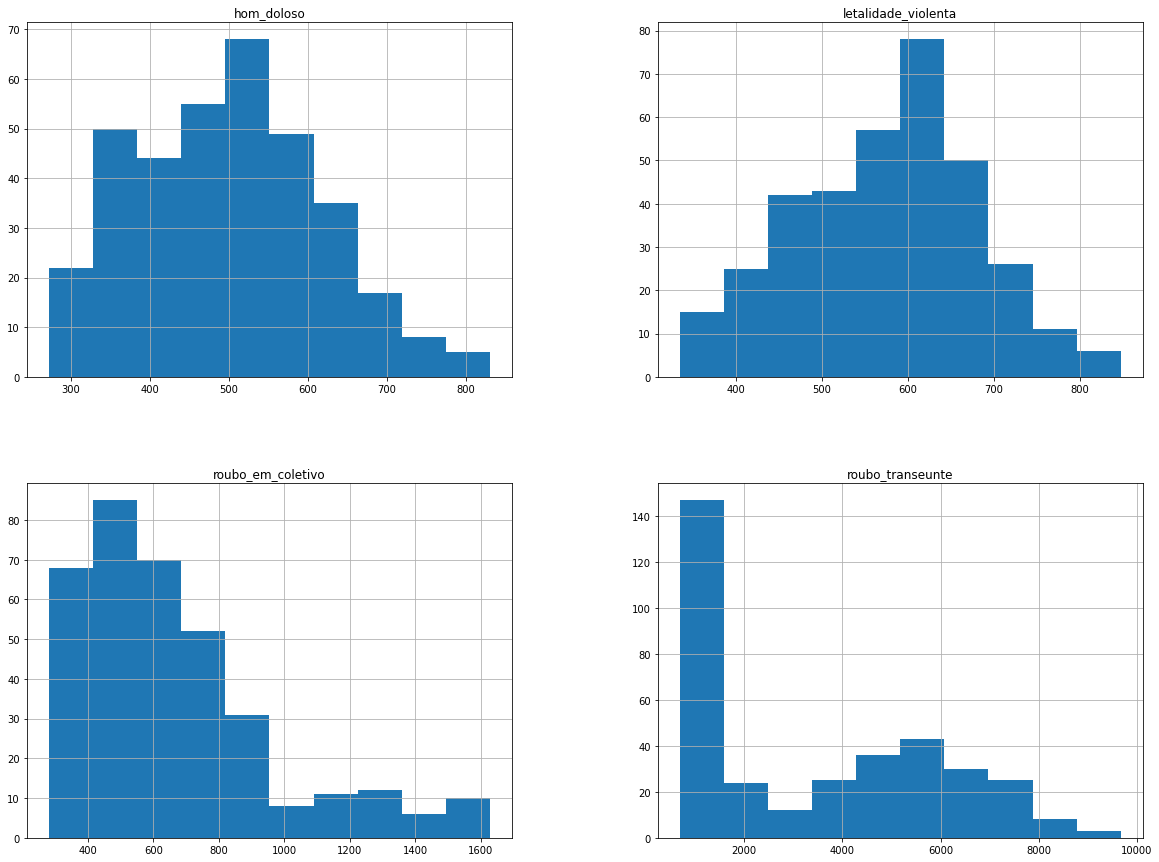

In [24]:
#histograma para crimes contra vida
df[['hom_doloso', 'roubo_transeunte', 'roubo_em_coletivo','letalidade_violenta']].hist(bins=10, figsize=(20,15));

Fazendo a leitura dos histogramas podemos concluir que:

*   Homicídios dolosos:
   *   Aproximadamente 70 meses teve entre 500 e 550 dos registros.
   *   Os números acima de 700 ocorreram em menos de 20 meses.  
*   Roubo em coletivo:
   *   Aproximadamente 85 meses aconteceram entre 400 a 550 dos registros.
   *   Acima de 1000 registros aconteceram em menos de 15 meses.
*   Letalidade Violenta:
   *   Aproximadamente 80 meses aconteceram entre 600 e 650 dos registros.
   *   Os registros abaixo de 400 e acima de 700 aconteceram em menos de 30 meses.
*   Roubo transeunte:
   *   Os reistros menores que 2000 aconteceram em, aproximadamente, 145 meses.
   *   Os registros acima de 2000 aconteceram em menos de 45 meses.
   * os registros acima de 8000 acontereram em menos de 10 meses.  

###**Gráfico de linha**

O gráfico de linha é muito utilizado para visualizar tendências, padrões e transformações ao longo do tempo. Sua produção é realizada através de pontos que são conectados por segmentos de retas. 

Esse tipo de gráfico é muito utilizado em todas as áreas e pode facilitar a nossa compreensão sobre determinado fenômeno ao longo dos anos. Vejamos um gráfico de linha representando as variáveis `roubo_comercio` e `roubo_residencia`. 

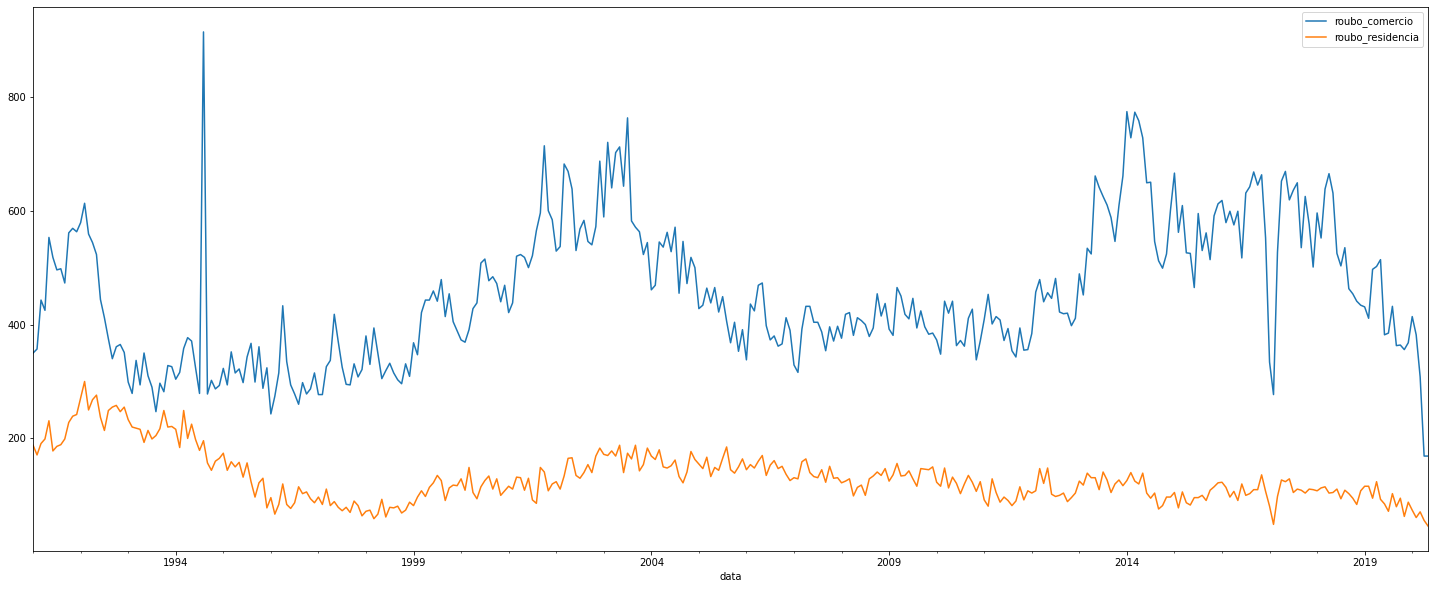

In [25]:
#plotar o gráfico de linhas
df[['roubo_comercio', 'roubo_residencia']].plot.line(figsize=(25,10));

A partir da analise do gráfico podemos concluir que:

*   O número de roubos em residências foram maiores antes de 1994.
*   A partir de 1994 o número de registros de roubos por mês mas residências ficaram abaixo de 200.
*   O roubo a comércios teve um pico de mais de 800 registros em alguns meses de 1994. Esse valor deve ser melhor analisado, pois pode se tratar de um dado *outlier*.
*   Alguns meses entre 2000-2004, 2013-2015 e 2017-2019 tiveram registros acima de 600 roubos a comércios, no resto do tempo, eles ficaram abaixo de 600. 

##**Conclusão**

Esse foi segundo projeto do curso Data Science na Prática do [Blog Sigmoidal](http://www.sigmoidal.ai). O objetivo desse projeto foi explorar e analisar os dados sobre violência do estado do Rio de Janeiro, disponibilizados pelo Instituto de Segurança Pública - [ISP](http://www.isp.rj.gov.br/).

Foi realizado um conjunto de técnicas de *DataScience* que, nos permitiu visualizar tanto as informações estatísticas de todos os tipos de crimes, como sobre os crimes sobre patrimônio (roubo e furtos de carros), como gráficos referentes a crimes contra a vida (homicídios, furtos e roubos, e letalidade violenta).

Como refere-se a um projeto de aprendizado, não tivemos a pretensão de realizar a analise de todo o conjunto de dados.

